In [2]:
import pandas as pd
import numpy as np

dtrain = pd.read_csv('./train.csv')
dtest = pd.read_csv('./test.csv')

from sklearn import model_selection

x_train, x_valid, y_train, y_valid = model_selection.train_test_split(
dtrain.drop(('label'), axis=1).astype('float32')/255.0,dtrain['label'],
test_size = 0.2, random_state = 11)

x_test=dtest.drop(('label'), axis=1)
y_test=dtest['label']

In [3]:
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(fit_intercept=True)
LRmodel.fit(x_train,y_train)
y_valid_predictions = LRmodel.predict(x_valid)

In [4]:
from sklearn import metrics

metrics.accuracy_score(y_valid_predictions, y_valid)

0.9154761904761904

In [5]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from keras import regularizers
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(500, input_dim=x_train.shape[1], activation="relu", kernel_initializer="normal", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(250, activation="relu", kernel_initializer="normal"))
model.add(Dense(50, activation="relu", kernel_initializer="normal"))
model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

C:\Users\class_000\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10, batch_size=400)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 4s 109us/step - loss: 4.4106 - acc: 0.7903 - val_loss: 1.1578 - val_acc: 0.9082
Epoch 2/10
33600/33600 [==============================] - 3s 96us/step - loss: 0.6647 - acc: 0.9196 - val_loss: 0.4198 - val_acc: 0.9311
Epoch 3/10
33600/33600 [==============================] - 3s 96us/step - loss: 0.3457 - acc: 0.9385 - val_loss: 0.3039 - val_acc: 0.9443
Epoch 4/10
33600/33600 [==============================] - 3s 100us/step - loss: 0.2776 - acc: 0.9493 - val_loss: 0.2730 - val_acc: 0.9525
Epoch 5/10
33600/33600 [==============================] - 3s 101us/step - loss: 0.2400 - acc: 0.9575 - val_loss: 0.2712 - val_acc: 0.9426
Epoch 6/10
33600/33600 [==============================] - 3s 98us/step - loss: 0.2341 - acc: 0.9579 - val_loss: 0.2470 - val_acc: 0.9527
Epoch 7/10
33600/33600 [==============================] - 3s 96us/step - loss: 0.2221 - acc: 0.9608 - val_loss: 0.2443 - val_a

In [7]:
scores = model.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

33600/33600 [==============================] - 3s 101us/step

acc: 97.20%


In [8]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

28000/28000 [==============================] - 3s 107us/step

acc: 100.00%


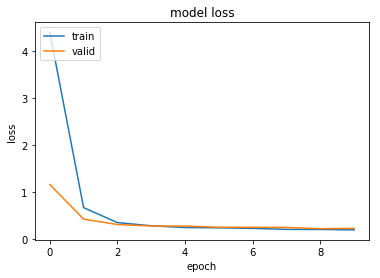

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()